In [81]:
import numpy
import pandas as pd
import nltk
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv(r'C:/Users/anany/Documents/GitHub/Amazon-Customer-Sentiment/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.drop('Time', axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df['Upvote%'] = numpy.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [9]:
df.drop(['HelpfulnessNumerator','HelpfulnessDenominator'], axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [43]:
df['Upvote Range'] = pd.cut(df['Upvote%'], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Empty', '0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%,Upvote Range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [44]:
df_pivot_table = df.groupby(['Score', 'Upvote Range']).agg({'Id':'count'}).reset_index()
df_pivot_table

,Score,Upvote Range,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [45]:
df_heatmap = df_pivot_table.pivot(index = 'Upvote Range',columns='Score')
df_heatmap

Id                     
Score             1     2      4       5
Upvote Range                            
Empty          8060  4234   4780   11638
0-20%          2338   762    116     432
20-40%         4649  1618    909    2275
40-60%         6586  3051   3185   10312
60-80%         5838  2486   2941   11060
80-100%       12531  7014  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='Upvote Range'>

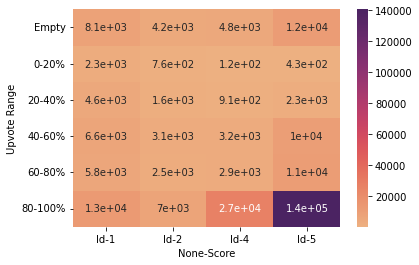

In [46]:
seaborn.heatmap(df_heatmap,annot=True, cmap='flare')

In [47]:
# Removing the rating inputs of 3-star as they are neither positive nor negative reviews
df = df[df['Score']!=3]
df['Score'].unique()

# Taking df['Text'] to be the data to work on 
X = df['Text']

In [48]:
# Mapping Score = 4,5 as positive (y=1) and Score = 1,2 as negative (y=0)
mapping_guide = {1:0,2:0,4:1,5:1}
y = df['Score'].map(mapping_guide)

In [49]:
CountVectorizer_var = CountVectorizer(stop_words='english')
X_count = CountVectorizer_var.fit_transform(X)
X_count.shape

(525814, 114969)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_count,y)
X_test.shape

# Fit the train data into Logistic Regression model
logistic_var = LogisticRegression()
log_model = logistic_var.fit(X_train, y_train)

print('Accuracy(Logistic Regression with CountVectorizer): {:.2f}%'.format(log_model.score(X_test, y_test)*100))

Accuracy(Logistic Regression with CountVectorizer): 93.68%


C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
df_word_coef = pd.DataFrame({'Word':CountVectorizer_var.get_feature_names_out(), 'Coefficient':log_model.coef_.tolist()[0]})
df_word_coef.sort_values(['Coefficient', 'Word'],ascending = False, inplace = True)

In [61]:
df_word_coef.head(20)

,Word,Coefficient
80600,pleasantly,4.236223
5865,addicting,3.184128
39072,downside,2.832258
35726,delish,2.583092
94667,skeptical,2.521277
39214,drawback,2.512069
105162,trainer,2.376819
55029,hooked,2.345376
87967,resist,2.265347
40342,economical,2.257499


In [62]:
df_word_coef.sort_values(['Coefficient', 'Word'], inplace = True)
df_word_coef.head(20)

,Word,Coefficient
34989,deceptive,-3.883098
107383,undrinkable,-3.567069
24949,cancelled,-3.274239
88945,ripoff,-3.169127
106852,unacceptable,-3.063976
35220,defeats,-3.043803
37560,disappointing,-3.003885
113164,worst,-2.964246
67898,mediocre,-2.911980
88351,returnable,-2.873192


In [71]:
# Combining the data modelling computations in a function

def fun_modelling(X, y, nlp_model, ml_model, show_topwords = 1):

    print('Vectorizing data...')
    X_vector = nlp_model.fit_transform(X)
    print('Vectorization complete!!!')
    print('Features: {}'.format(X_vector.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X_vector,y) 
    print('Training model...')
    fit_model = ml_model.fit(X_train, y_train)
    print('Model Trained!!!')

    print('Calculating accuracy...')
    accuracy = fit_model.score(X_test, y_test) 
    print('Accuracy: {:.2f}'.format(accuracy*100))  

    if show_topwords == 1:
        df_word_coef = pd.DataFrame({'Word':CountVectorizer_var.get_feature_names_out(), 'Coefficient':log_model.coef_.tolist()[0]})
        # Displaying top positive words
        df_word_coef.sort_values(['Coefficient', 'Word'],ascending = False, inplace = True)
        print('Displaying top words from positive reviews:')
        print(df_word_coef.head(10))
        print()

        # Displaying top negative words
        df_word_coef.sort_values(['Coefficient', 'Word'], inplace = True)
        print('Displaying top words from negative reviews:')
        print(df_word_coef.head(10))

In [72]:
fun_modelling(X, y, CountVectorizer(stop_words='english'), LogisticRegression())

Vectorizing data...
Vectorization complete!!!
Features: 114969
Training model...


C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained!!!
Calculating accuracy...
Accuracy: 93.67
Displaying top words from positive reviews:
              Word  Coefficient
80600   pleasantly     4.236223
5865     addicting     3.184128
39072     downside     2.832258
35726       delish     2.583092
94667    skeptical     2.521277
39214     drawback     2.512069
105162     trainer     2.376819
55029       hooked     2.345376
87967       resist     2.265347
40342   economical     2.257499

Displaying top words from negative reviews:
                 Word  Coefficient
34989       deceptive    -3.883098
107383    undrinkable    -3.567069
24949       cancelled    -3.274239
88945          ripoff    -3.169127
106852   unacceptable    -3.063976
35220         defeats    -3.043803
37560   disappointing    -3.003885
113164          worst    -2.964246
67898        mediocre    -2.911980
88351      returnable    -2.873192


In [82]:
def predict_values(X, y, nlp_model, ml_model):
    print('Vectorizing data...')
    X_vector = nlp_model.fit_transform(X)
    print('Vectorization complete!!!')
    print('Features: {}'.format(X_vector.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X_vector,y) 
    print('Training model...')
    fit_model = ml_model.fit(X_train, y_train)
    print('Model Trained!!!')

    model_predictions = fit_model.predict(X_test)

    print('Calculating Confusion Matrix...')
    c_matrix = ConfusionMatrixDisplay.from_predictions(y_test, model_predictions)
    print(c_matrix)

    print('Calculating accuracy...')
    accuracy = accuracy_score(model_predictions, y_test) 
    print('Accuracy: {:.2f}'.format(accuracy*100))

Vectorizing data...
Vectorization complete!!!
Features: 114969
Training model...


C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained!!!
Calculating Confusion Matrix...
Calculating accuracy...
Accuracy: 93.66


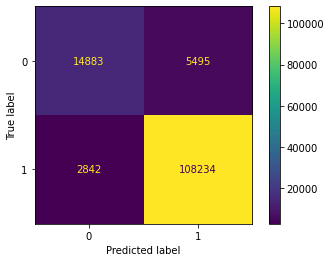

In [83]:
count = CountVectorizer(stop_words='english')
Log_reg = LogisticRegression()
predict_values(X,y,count, Log_reg)